In [2]:
import pandas as pd
import numpy as np
from methods import *
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


## Drop dublicates

In [4]:
dfUniq = df.drop_duplicates()
dfUniq

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


Нет в данном датасете дубликатов

## Male df and Female df

In [5]:
height = df['Height'].values
weight = df['Weight'].values
print(height)
print(weight)


[73.84701702 68.78190405 74.11010539 ... 63.86799221 69.03424313
 61.94424588]
[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]


In [6]:
for i in range(len(height)):
    height[i] *= 2.54
    weight[i] /= 2.54

df_stnd = df
df_stnd['Height'] = height
df_stnd['Weight'] = weight
print(df_stnd)

      Gender      Height     Weight
0       Male  187.571423  95.233686
1       Male  174.706036  63.901761
2       Male  188.239668  83.756242
3       Male  182.196685  86.630894
4       Male  177.499761  81.240079
...      ...         ...        ...
9995  Female  168.078536  53.849391
9996  Female  170.350573  67.270829
9997  Female  162.224700  50.580834
9998  Female  175.346978  64.508843
9999  Female  157.338385  44.743741

[10000 rows x 3 columns]


In [7]:
df_male = df_stnd[df_stnd["Gender"] == 'Male']
df_male

,Gender,Height,Weight
0,Male,187.571423,95.233686
1,Male,174.706036,63.901761
2,Male,188.239668,83.756242
3,Male,182.196685,86.630894
4,Male,177.499761,81.240079
...,...,...,...
4995,Male,174.904559,69.736635
4996,Male,175.192494,62.710720
4997,Male,170.215039,78.423386
4998,Male,181.756605,73.191303


In [8]:
df_female = df_stnd[df_stnd["Gender"] == 'Female']
df_female

,Gender,Height,Weight
5000,Female,149.633259,40.192254
5001,Female,165.684232,55.632214
5002,Female,160.957270,51.591103
5003,Female,163.779193,50.461225
5004,Female,156.954464,51.095042
...,...,...,...
9995,Female,168.078536,53.849391
9996,Female,170.350573,67.270829
9997,Female,162.224700,50.580834
9998,Female,175.346978,64.508843


## Stat functions

In [9]:
mathMean(df_male, 'Height')

175.32691860179224

In [10]:
mathMean(df_female, 'Weight')

53.48822559349147

In [11]:
stndError(df_male, 'Height')

7.272940060798043

In [12]:
minimum(df_female, 'Height')

137.82835864574665

In [13]:
maximum(df_male, 'Height')

200.6568055598296

In [14]:
quantile(df_male, 0, 1)

c:\Users\ganya\PycharmProjects\pr4\methods.py:21: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return data.quantile(q, axis=0)


Height    200.656806
Weight    106.295157
Name: 1.0, dtype: float64

## Plots

(array([  10.,   69.,  343., 1004., 1497., 1319.,  585.,  143.,   27.,
           3.]),
 array([ 44.44997616,  50.63449423,  56.81901231,  63.00353038,
         69.18804845,  75.37256653,  81.5570846 ,  87.74160267,
         93.92612075, 100.11063882, 106.29515689]),
 <BarContainer object of 10 artists>)

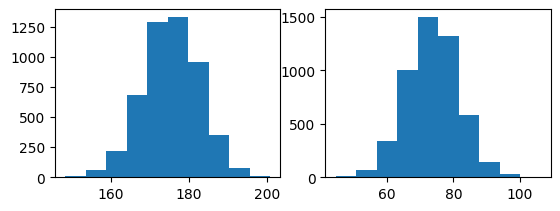

In [15]:
plt.subplot(2,2,1)
plt.hist(x=df_male['Height'])
plt.subplot(2,2,2)
plt.hist(x=df_male['Weight'])

(array([   6.,   45.,  244.,  701., 1245., 1394.,  884.,  379.,   88.,
          14.]),
 array([25.47249083, 30.88733678, 36.30218272, 41.71702867, 47.13187462,
        52.54672056, 57.96156651, 63.37641245, 68.7912584 , 74.20610435,
        79.62095029]),
 <BarContainer object of 10 artists>)

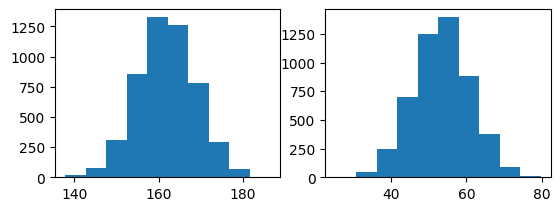

In [16]:
plt.subplot(2,2,1)
plt.hist(x=df_female['Height'])
plt.subplot(2,2,2)
plt.hist(x=df_female['Weight'])

## K-means clustering

In [17]:
X = df_stnd.iloc[:, [ 1, 2]].values
X

array([[187.57142322,  95.23368629],
       [174.70603628,  63.90176084],
       [188.2396677 ,  83.75624235],
       ...,
       [162.22470022,  50.58083417],
       [175.34697755,  64.50884305],
       [157.33838453,  44.74374121]])

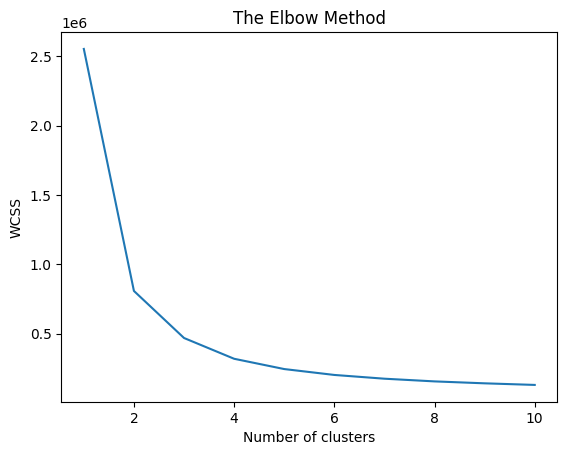

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [19]:
from sklearn.metrics import rand_score
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(X)

[[187.57142322  95.23368629]
 [174.70603628  63.90176084]
 [188.2396677   83.75624235]
 ...
 [162.22470022  50.58083417]
 [175.34697755  64.50884305]
 [157.33838453  44.74374121]]


In [20]:
df2 = df_stnd
y_kmeans_list = list(y_kmeans)
for i in range(len(y_kmeans_list)):
    y_kmeans_list[i] += 1

tmp = list(df.iloc[:, 2].values)

k = 0

clusters = []

for i in range(len(tmp)):
    clusters.append(y_kmeans_list[k])
    k += 1

true_clusters = []
genders = list(df2['Gender'])
for i in range(len(genders)):
    if genders[i] == 'Male':
        true_clusters.append(2)
    else:
        true_clusters.append(1)

df2['Cluster'] = clusters
df2['True cluster'] = true_clusters
df2.to_excel('clusters.xlsx')
df2.head()


,Gender,Height,Weight,Cluster,True cluster
0,Male,187.571423,95.233686,2,2
1,Male,174.706036,63.901761,2,2
2,Male,188.239668,83.756242,2,2
3,Male,182.196685,86.630894,2,2
4,Male,177.499761,81.240079,2,2


In [33]:
print(rand_score(true_clusters, y_kmeans))
kmeans.predict([[175,62]])

0.8020001200120012


array([1])

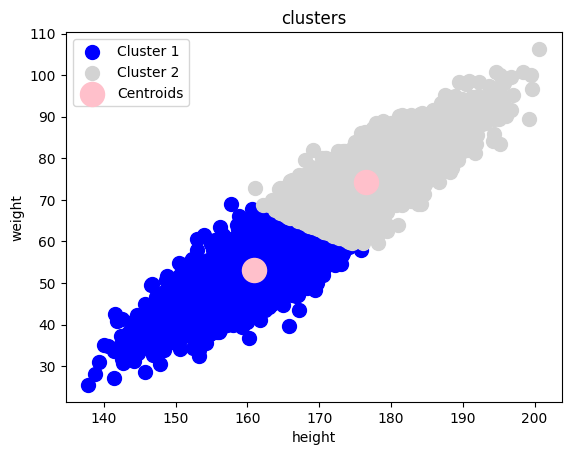

In [30]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'lightgray', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'pink', label = 'Centroids')
plt.title('clusters')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.show()

## Hierarchical clustering

In [25]:

X = df_stnd.iloc[:, [ 1, 2]].values

In [42]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

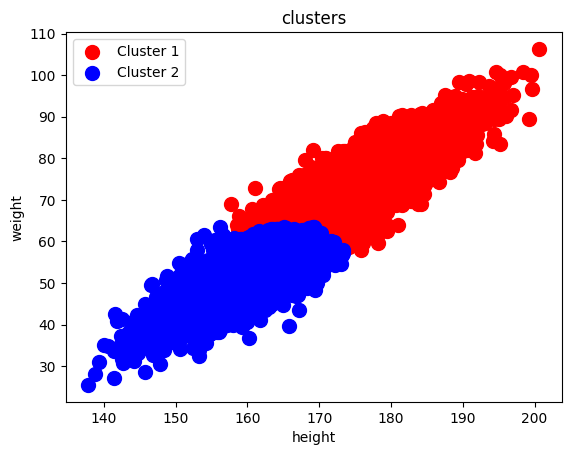

In [31]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('clusters')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.show()

In [44]:
print(rand_score(true_clusters, y_hc))
hc.fit_predict([[175,62],[165, 51]])

0.809193399339934


array([1, 0], dtype=int64)

# 68%

In [45]:
mean = mathMean(df_male, 'Height')
print(mean)
sigm = stndError(df_male, 'Height')
oneDist = [mean-sigm, mean+sigm]
oneDist

175.32691860179224


[168.0539785409942, 182.5998586625903]

In [46]:
mean = mathMean(df_male, 'Height')
sigm = stndError(df_male, 'Height')
oneDist = [mean-sigm, mean+sigm]
oneDist

[168.0539785409942, 182.5998586625903]

In [47]:
dftmp = df_male[df_stnd["Height"] < oneDist[1]]
dftmp2 = df_male[df_stnd["Height"] > oneDist[0]]

C:\Users\ganya\AppData\Local\Temp\ipykernel_116\786117371.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dftmp = df_male[df_stnd["Height"] < oneDist[1]]
C:\Users\ganya\AppData\Local\Temp\ipykernel_116\786117371.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dftmp2 = df_male[df_stnd["Height"] > oneDist[0]]


In [48]:
df = pd.merge(dftmp, dftmp2, how='inner')
print(df)

     Gender      Height     Weight
0      Male  174.706036  63.901761
1      Male  182.196685  86.630894
2      Male  177.499761  81.240079
3      Male  170.822660  59.926046
4      Male  174.714106  72.412555
...     ...         ...        ...
3442   Male  174.904559  69.736635
3443   Male  175.192494  62.710720
3444   Male  170.215039  78.423386
3445   Male  181.756605  73.191303
3446   Male  178.693775  78.308272

[3447 rows x 3 columns]


# 95%

In [49]:
oneDist = [mean-sigm-sigm, mean+sigm+sigm]
oneDist

[160.78103848019614, 189.87279872338834]

In [50]:
dftmp = df_male[df_male["Height"] < oneDist[1]]
dftmp2 = df_male[df_male["Height"] > oneDist[0]]

In [51]:
df = pd.merge(dftmp, dftmp2, how='inner')
print(df)

     Gender      Height     Weight
0      Male  187.571423  95.233686
1      Male  174.706036  63.901761
2      Male  188.239668  83.756242
3      Male  182.196685  86.630894
4      Male  177.499761  81.240079
...     ...         ...        ...
4765   Male  174.904559  69.736635
4766   Male  175.192494  62.710720
4767   Male  170.215039  78.423386
4768   Male  181.756605  73.191303
4769   Male  178.693775  78.308272

[4770 rows x 3 columns]


# 99,7%

In [52]:
oneDist = [mean-sigm-sigm-sigm, mean+sigm+sigm+sigm]
oneDist

[153.5080984193981, 197.1457387841864]

In [53]:
dftmp = df_male[df_male["Height"] < oneDist[1]]
dftmp2 = df_male[df_male["Height"] > oneDist[0]]

In [54]:
df = pd.merge(dftmp, dftmp2, how='inner')
print(df)

     Gender      Height     Weight
0      Male  187.571423  95.233686
1      Male  174.706036  63.901761
2      Male  188.239668  83.756242
3      Male  182.196685  86.630894
4      Male  177.499761  81.240079
...     ...         ...        ...
4980   Male  174.904559  69.736635
4981   Male  175.192494  62.710720
4982   Male  170.215039  78.423386
4983   Male  181.756605  73.191303
4984   Male  178.693775  78.308272

[4985 rows x 3 columns]
